<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/colt_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("UFC.csv")

Rows: 1674 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Column1, fighter_name, Stance
dbl (12): Height, Weight, Reach, Birthyear, SLpM, Str_Acc, SApM, Str_Def, TD...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
df %>% head

Column1,fighter_name,Height,Weight,Reach,Stance,Birthyear,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Shamil Abdurakhimov,75,235,76,Orthodox,1981,2.45,44,2.45,58,1.23,24,47,0.2
2,Daichi Abe,71,170,71,Orthodox,1991,3.80,33,4.49,56,0.33,50,0,0.0
3,Klidson Abreu,72,205,74,Orthodox,1992,2.05,40,2.90,55,0.64,20,80,0.0
4,Juan Adams,77,265,80,Orthodox,1992,7.09,55,4.06,34,0.91,66,57,0.0
5,Anthony Adams,73,185,76,Orthodox,1988,3.17,41,5.93,44,0.00,0,0,0.0
6,Israel Adesanya,76,185,80,Switch,1989,3.95,49,2.63,61,0.00,0,82,0.3


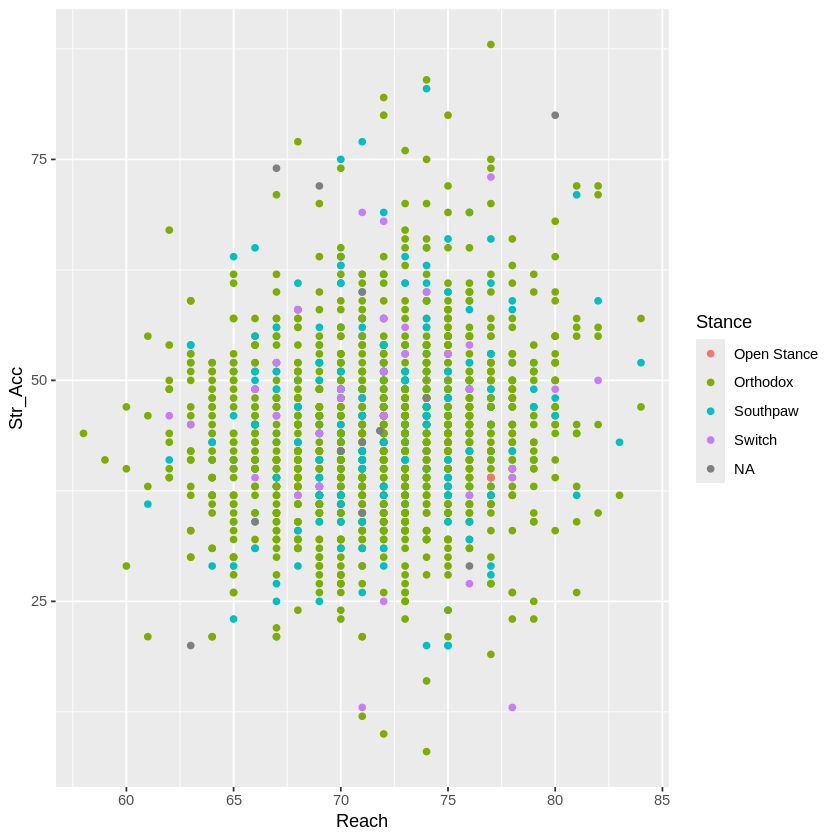

In [5]:
df %>% ggplot(aes(x=Reach, y=Str_Acc, color = Stance)) + geom_point()

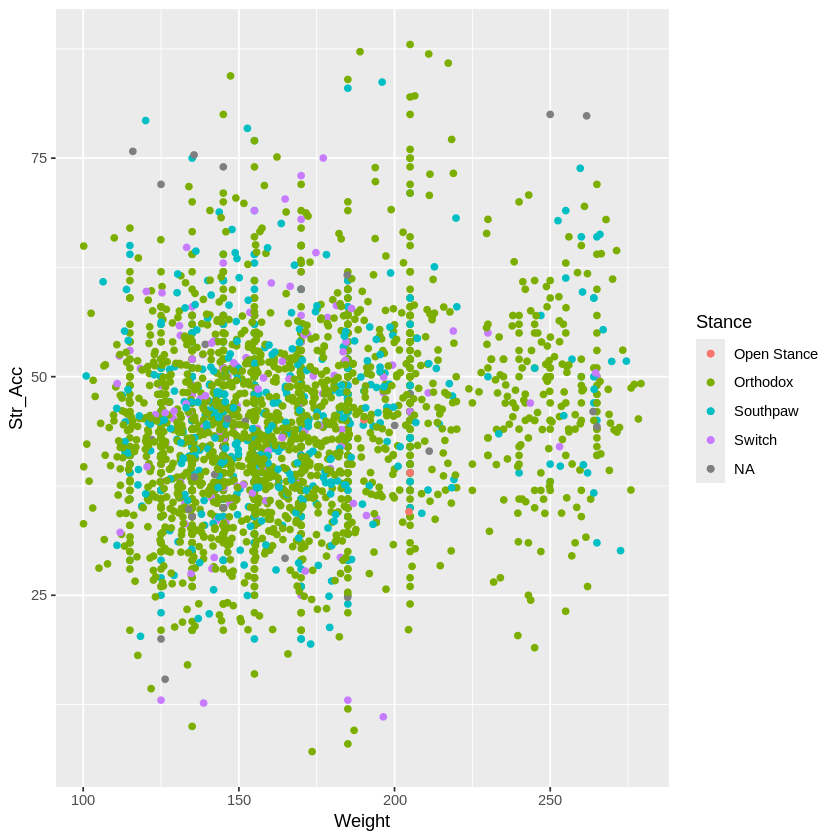

In [13]:
df %>% ggplot(aes(x=Weight, y=Str_Acc, color = Stance)) + geom_point() + geom_jitter(height=5, width=15)

In [20]:
summary(df$SApM)
summary(df$SLpM)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.100   2.480   3.200   3.506   4.150  21.180       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.130   2.280   3.150   3.316   4.070  19.910       1 

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


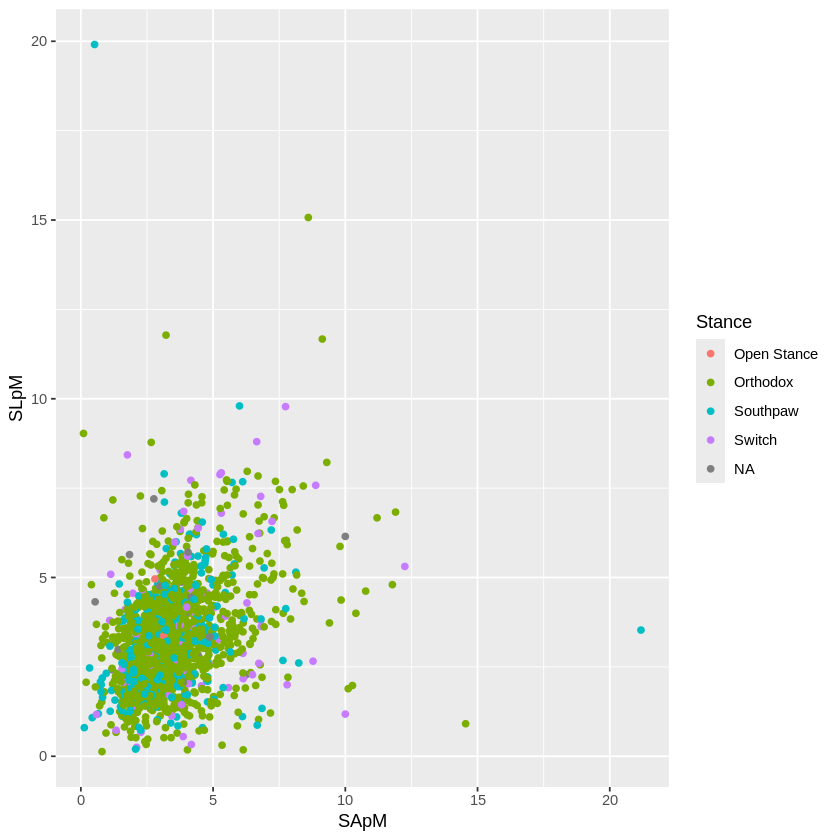

In [21]:
df %>% ggplot(aes(x=SApM, y=SLpM, color = Stance)) + geom_point()

In [14]:
df %>% colnames

[1] "Column1"      "fighter_name" "Height"       "Weight"       "Reach"       
 [6] "Stance"       "Birthyear"    "SLpM"         "Str_Acc"      "SApM"        
[11] "Str_Def"      "TD_Avg"       "TD_Acc"       "TD_Def"       "Sub_Avg"

In [34]:
model1 <- lm(Str_Acc ~ Stance + Reach + Weight, data = df)
summary(model1)


Call:
lm(formula = Str_Acc ~ Stance + Reach + Weight, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.985  -5.902  -0.490   5.416  42.004 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    31.10691    8.28528   3.754  0.00018 ***
StanceOrthodox  3.97870    6.65344   0.598  0.54993    
StanceSouthpaw  5.01055    6.66940   0.751  0.45259    
StanceSwitch    6.03946    6.71808   0.899  0.36879    
Reach           0.01198    0.08429   0.142  0.88701    
Weight          0.04872    0.01026   4.749 2.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.398 on 1648 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.0351,	Adjusted R-squared:  0.03217 
F-statistic: 11.99 on 5 and 1648 DF,  p-value: 2.014e-11


In [35]:
cor(df$Str_Acc, df$Reach)
cor(df$Str_Acc, df$Weight)

[1] 0.1385823

[1] 0.1773257

In [16]:
model2 <- lm(Str_Acc ~ Stance + Reach + Weight + SLpM, data = df)
summary(model2)


Call:
lm(formula = Str_Acc ~ Stance + Reach + Weight + SLpM, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.242  -5.637  -0.372   4.670  45.199 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    22.198081   7.769491   2.857  0.00433 ** 
StanceOrthodox  5.872755   6.223154   0.944  0.34546    
StanceSouthpaw  7.132335   6.238392   1.143  0.25308    
StanceSwitch    7.249359   6.282881   1.154  0.24874    
Reach           0.004698   0.078823   0.060  0.95248    
Weight          0.050996   0.009595   5.315 1.21e-07 ***
SLpM            2.162715   0.140334  15.411  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.788 on 1647 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.1567,	Adjusted R-squared:  0.1536 
F-statistic: 51.01 on 6 and 1647 DF,  p-value: < 2.2e-16


In [17]:
model3 <- lm(Str_Acc ~ Stance + Reach + Weight + SLpM + SApM, data = df)
summary(model3)


Call:
lm(formula = Str_Acc ~ Stance + Reach + Weight + SLpM + SApM, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.781  -5.492  -0.690   4.379  43.024 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    27.123008   7.521264   3.606  0.00032 ***
StanceOrthodox  7.094421   6.014421   1.180  0.23834    
StanceSouthpaw  8.073494   6.028716   1.339  0.18070    
StanceSwitch    9.152563   6.073611   1.507  0.13202    
Reach          -0.036174   0.076259  -0.474  0.63531    
Weight          0.052438   0.009272   5.655 1.83e-08 ***
SLpM            2.706183   0.144544  18.722  < 2e-16 ***
SApM           -1.492324   0.137426 -10.859  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.492 on 1646 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.2131,	Adjusted R-squared:  0.2097 
F-statistic: 63.67 on 7 and 1646 DF,  p-value: < 2.2e-16


In [22]:
model4 <- lm(Str_Acc ~ Stance + Reach + Weight + SLpM + SApM + TD_Acc, data = df)
summary(model4)


Call:
lm(formula = Str_Acc ~ Stance + Reach + Weight + SLpM + SApM + 
    TD_Acc, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.257  -5.486  -0.757   4.368  43.365 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    26.053137   7.483121   3.482 0.000511 ***
StanceOrthodox  6.694284   5.981477   1.119 0.263231    
StanceSouthpaw  7.711065   5.995567   1.286 0.198580    
StanceSwitch    8.825165   6.040105   1.461 0.144180    
Reach          -0.041413   0.075842  -0.546 0.585112    
Weight          0.052951   0.009221   5.742 1.11e-08 ***
SLpM            2.657452   0.144157  18.434  < 2e-16 ***
SApM           -1.338847   0.140994  -9.496  < 2e-16 ***
TD_Acc          0.038210   0.008639   4.423 1.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.444 on 1645 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.2223,	Adjusted R-squared:  0.21

In [28]:
model5 <- lm(Str_Acc ~ Stance +  Reach + Weight  + SLpM + SApM + TD_Acc + Sub_Avg, data = df)
summary(model5)


Call:
lm(formula = Str_Acc ~ Stance + Reach + Weight + SLpM + SApM + 
    TD_Acc + Sub_Avg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.023  -5.317  -0.677   4.379  43.068 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25.574419   7.398421   3.457 0.000561 ***
StanceOrthodox  6.602990   5.913475   1.117 0.264328    
StanceSouthpaw  7.677398   5.927390   1.295 0.195419    
StanceSwitch    8.827500   5.971419   1.478 0.139521    
Reach          -0.057503   0.075023  -0.766 0.443511    
Weight          0.055267   0.009124   6.057 1.71e-09 ***
SLpM            2.777808   0.143813  19.315  < 2e-16 ***
SApM           -1.259152   0.139973  -8.996  < 2e-16 ***
TD_Acc          0.034591   0.008561   4.041 5.57e-05 ***
Sub_Avg         1.186345   0.189819   6.250 5.22e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.348 on 1644 degrees of freedom
  (20 observations deleted due to 

In [36]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(stargazer)

# Display the models in a single summary table
stargazer(model1, model2, model3, model4, model5,
          type = "text",         # Use "html" or "latex" for publication
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
          dep.var.caption = "Dependent Variable: Strike Accuracy",
          align = TRUE,
          no.space = TRUE)


Regression Results
                                                                Dependent Variable: Strike Accuracy                                             
                    ----------------------------------------------------------------------------------------------------------------------------
                                                                              Str_Acc                                                           
                            Model 1                  Model 2                  Model 3                  Model 4                  Model 5         
                              (1)                      (2)                      (3)                      (4)                      (5)           
------------------------------------------------------------------------------------------------------------------------------------------------
StanceOrthodox               3.979                    5.873                    7.094                    6.694 

In [39]:
# Display the models in a single summary table
stargazer(model1, model2, model3, model4, model5,
          type = "latex",         # Use "html" or "latex" for publication
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
          dep.var.caption = "Dependent Variable: Strike Accuracy",
          align = TRUE,
          no.space = TRUE)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Fri, Apr 04, 2025 - 01:58:13 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{5}{c}{Dependent Variable: Strike Accuracy} \\ 
\cline{2-6} 
\\[-1.8ex] & \multicolumn{5}{c}{Str\_Acc} \\ 
 & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)} & \multicolumn{1}{c}{(4)} & \multicolumn{1}{c}{(5)}\\ 
\hline \\[-1.8ex] 
 StanceOrthodox & 3.979 & 5.873 & 7.094 & 6.694 & 6.603 \\ 
  & (6.653) & (6.223) & (6.014) & (5.981) & (5.913) \\ 
  StanceSouthpaw & 5.011 & 7.13